# Make All Figures for Main Manuscript

Kendra Wyant  
October 3, 2025

In [ ]:
#| message: false
#| warning: false

suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(tidymodels))
suppressPackageStartupMessages(source("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true"))

theme_set(theme_classic())

path_models <- format_path(str_c("risk/models/messages"))

model_full <- read_rds(here::here(path_models, "best_model_v17_kfold_full.rds"))

In [ ]:
feat_imp <- model_full |> 
  tidy() |> 
  mutate(estimate = -1 * estimate) |> 
  filter(abs(estimate) > 0) |> 
  filter(term != "(Intercept)") |> 
  mutate(term = case_match(term,
                           "abstinence_confidence" ~ "Abstinence confidence", 
                           "abstinence_goal_Yes" ~ "Goal of abstinence",
                           "efficacy_neg_affect" ~ "Negative affect efficacy",
                           "craving_total" ~ "Craving",
                           "demo_income" ~ "Income",
                           "demo_sex_Male" ~ "Male",
                           "indiv_doa" ~ "Individual alcohol counseling",
                           .default = term)) |> 
  mutate(term = if_else(str_detect(term, "cont_type_abr.friend"), "Communications with friends", term),
         term = if_else(str_detect(term, ".NonDrinker"), "Communications with non-drinkers", term),
         term = if_else(str_detect(term, "contact_drink_future"), "Communications with people who would drink in their presence", term),
         term = if_else(str_detect(term, ".Drinker"), "Communications with drinkers", term),
         term = if_else(str_detect(term, ".phone_number"), "Number of unique contacts", term))|> 
  group_by(term) |> 
  summarise(estimate = mean(estimate)) |> 
  arrange(desc(abs(estimate))) |> 
  mutate(term = reorder(term, abs(estimate)))  |> 
  ggplot(aes(x = estimate, y = term, fill = estimate > 0)) +
  geom_col() +
  scale_fill_manual(values = c("TRUE" = "tomato", "FALSE" = "steelblue")) +
  labs(
    x = "Coefficient",
    y = NULL,
    title = "Feature Importance"
  ) +
  theme(legend.position = "none")


Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loaded glmnet 4.1-8

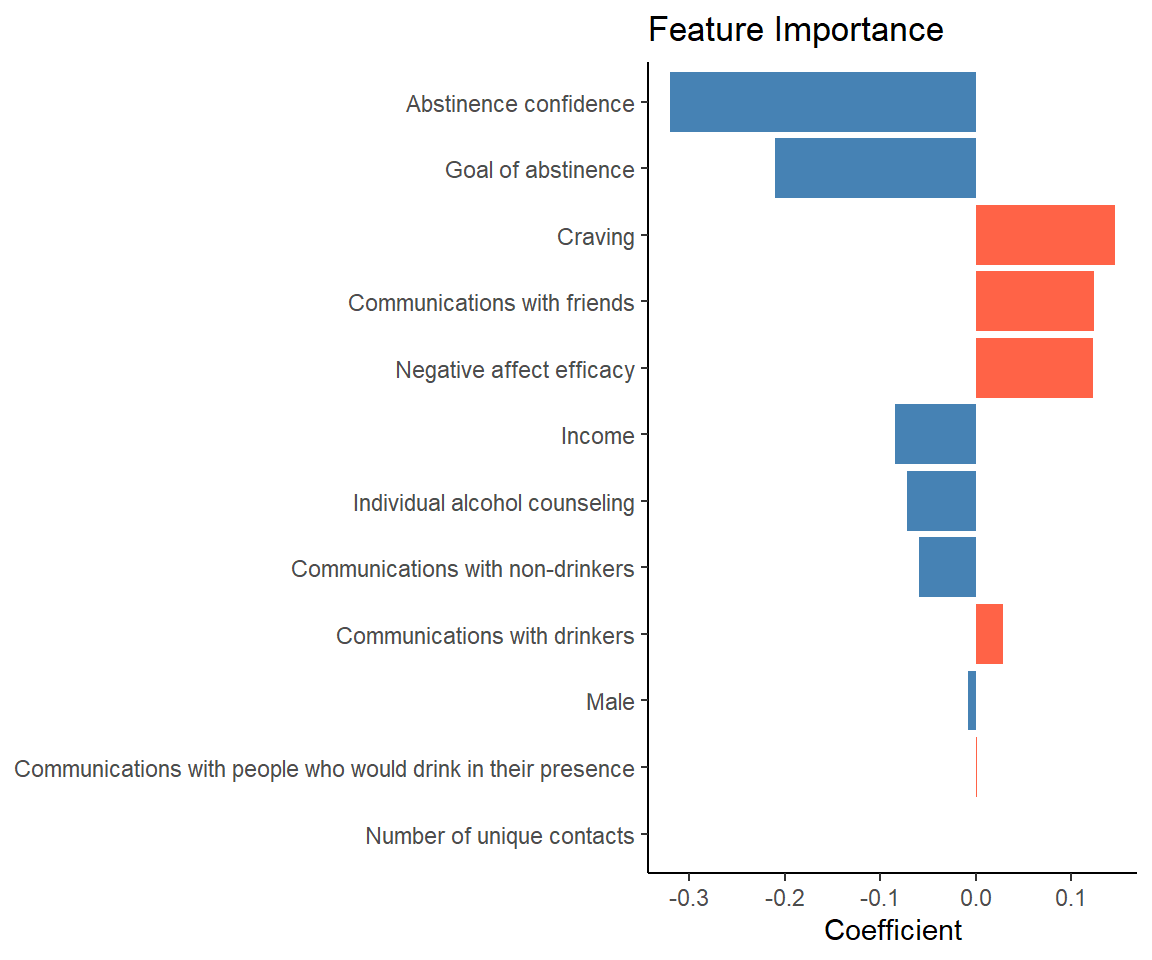

In [ ]:
#| label: fig-1
#| fig-cap: "Global feature importance (glmnet coefficient) for the full model. Features are ordered by absolute coefficient value. Rate counts of communications with friends, non-drinkers, and drinkers were calculated across varying scoring epochs. Standardized coefficients were averaged across retained epochs to produce single aggregate feature importance score. Blue bars indicate higher feature values on average lower lapse risk. Red bars indicate higher feature values on average increase risk."
#| fig-width: 6
#| fig-height: 5

feat_imp 